<a href="https://colab.research.google.com/github/otanet/LangChain_Summarization_202304/blob/main/%E3%83%93%E3%82%B8%E3%83%8D%E3%82%B9%E3%83%A1%E3%83%BC%E3%83%AB_%E3%82%A4%E3%83%B3%E3%82%B9%E3%83%88%E3%83%A9%E3%82%AF%E3%83%88_20230419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ビジネスメールを可視化して、１）何がテーマで、２）何をすべきか？ ３）何が期待されているかを伝えてくれるアプリケーションを想定して、検討したものです。

### 1. ビジネスメールの内容
### 2. ビジネスメールの可視化と要約処理(map-reduce)
##### The map_reduce Chain：並列処理型の自動要約    

### 3. ビジネスメールの可視化と要約処理(map-reduceにテンプレートを付けて処理させたもの)
### 4. ビジネスメールの可視化と要約処理(refineにテンプレートを付けて処理させたもの)    
### The refine Chain：翻訳とオリジナルを繰り返す自動要約     
### 5.考察・まとめ
### 6.参考文献・URL一覧


In [1]:
!pip install langchain==0.0.125 openai==0.27.2 tiktoken==0.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.2/443.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.9
    Uninstalling

In [2]:
from langchain.document_loaders.image import UnstructuredImageLoader
from langchain import OpenAI, PromptTemplate, LLMChain
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.docstore.document import Document
from langchain.chat_models import ChatOpenAI
import os

os.environ["OPENAI_API_KEY"] = "***********"

In [3]:
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0, max_tokens=1000)
text_splitter = CharacterTextSplitter(chunk_size=1000)

In [4]:
with open("ビジネスメール本文1.txt") as f:
    state_of_the_union = f.read()
texts = text_splitter.split_text(state_of_the_union)

docs = [Document(page_content=t) for t in texts]

In [5]:
docs

[Document(page_content='件名：\nアルファカレッジのシラバスの件\n\n本文：\n山浦マネージャー\nお疲れ様です。\nさっそくですが、アルファカレッジのシラバス作成時期となりました。\nついてはアルファカレッジの来年度のシラバス書式の案を検討しました。\n添付のファイルの案のように改訂したいと考えます。\n早々に、講師陣にシラバス作成を依頼したいと考えます。\n\n和田', metadata={})]

### 1. ビジネスメールの内容
件名：
アルファカレッジのシラバスの件

本文：
山浦マネージャー
お疲れ様です。
さっそくですが、アルファカレッジのシラバス作成時期となりました。
ついてはアルファカレッジの来年度のシラバス書式の案を検討しました。
添付のファイルの案のように改訂したいと考えます。
早々に、講師陣にシラバス作成を依頼したいと考えます。

和田



### 2. ビジネスメールの可視化と要約処理(map-reduce)
### The map_reduce Chain：並列処理型の自動要約    



### 3. ビジネスメールの可視化と要約処理(map-reduceにテンプレートを付けて処理させたもの)

### GraphGPTで可視化
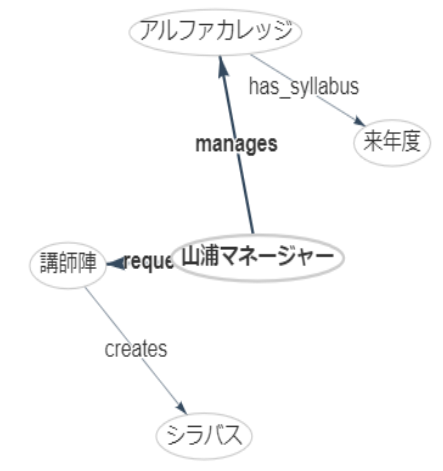

In [6]:
# 1. The map_reduce Chain：並列処理型の自動要約
%%time
chain = load_summarize_chain(llm, chain_type="map_reduce")
chain.run(docs)

CPU times: user 475 ms, sys: 67.5 ms, total: 542 ms
Wall time: 9.8 s


'The email from Wada is about revising the syllabus format for Alpha College and includes proposed changes in an attached file. Yamaura suggests starting to create the syllabus soon and the email is addressed to instructors.'

### 和田からのメールは、アルファカレッジのシラバス形式の改訂に関するもので、添付ファイルに変更案が含まれています。山浦氏は、すぐにシラバスの作成を開始することを提案し、電子メールは講師に宛てられています。    
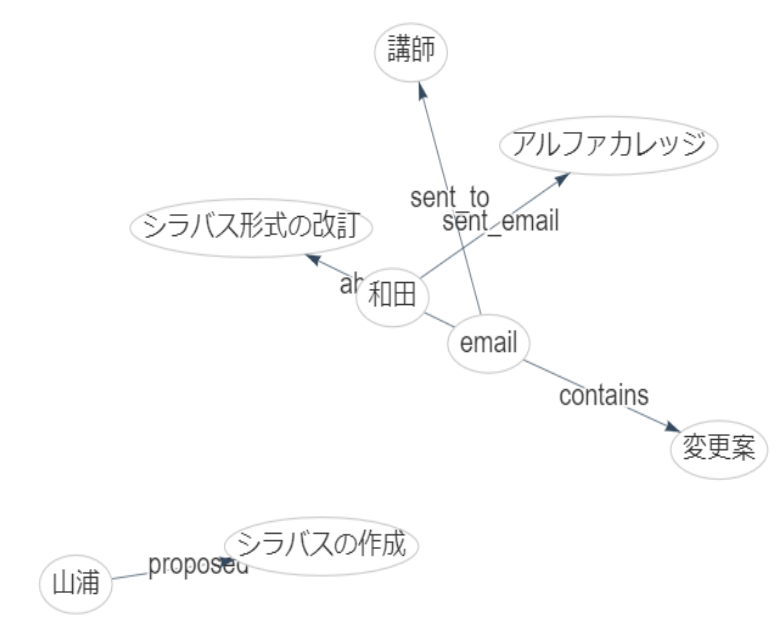

#### 要約の処理過程を可視化
#### 1. The map_reduce Chain：並列処理型の自動要約

In [7]:
#map_reduceでの処理過程の可視化
chain = load_summarize_chain(llm, chain_type="map_reduce", verbose=True)
chain.run(docs)



> Entering new MapReduceDocumentsChain chain...
Prompt after formatting:
Write a concise summary of the following:


"件名：
アルファカレッジのシラバスの件

本文：
山浦マネージャー
お疲れ様です。
さっそくですが、アルファカレッジのシラバス作成時期となりました。
ついてはアルファカレッジの来年度のシラバス書式の案を検討しました。
添付のファイルの案のように改訂したいと考えます。
早々に、講師陣にシラバス作成を依頼したいと考えます。

和田"


CONCISE SUMMARY:


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"The email is about the syllabus for Alpha College and the manager, Yamaura, suggests revising the format for the upcoming academic year. The attached file contains the proposed changes and they plan to request the instructors to start creating the syllabus soon. The email is from Wada."


CONCISE SUMMARY:

> Finished chain.

> Finished chain.


'The email from Wada is about revising the syllabus format for Alpha College and includes proposed changes in an attached file. Yamaura suggests starting to create the syllabus soon and the email is addressed to instructors.'

#### The email is about the syllabus for Alpha College and the manager, Yamaura, suggests revising the format for the upcoming academic year. The attached file contains the proposed changes and they plan to request the instructors to start creating the syllabus soon. The email is from Wada.    

#### そのメールはアルファカレッジのシラバスに関するもので、管理者の山浦は来年度に向けてフォーマットを改訂することを提案しています。添付ファイルには提案された変更が含まれており、彼らはインストラクターにシラバスの作成をすぐに開始するように要求する予定です。和田からのメールです。    

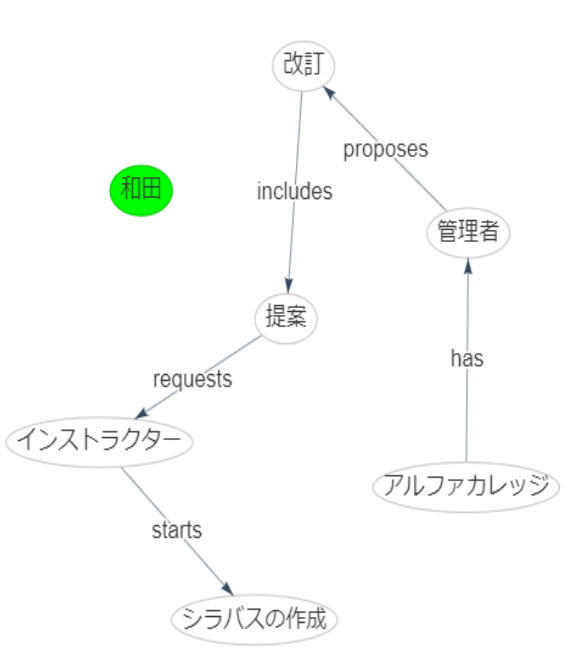

#### The email from Wada is about revising the syllabus format for Alpha College and includes proposed changes in an attached file. Yamaura suggests starting to create the syllabus soon and the email is addressed to instructors.

#### 和田からのメールは、アルファカレッジのシラバス形式の改訂に関するもので、添付ファイルに変更案が含まれています。山浦氏は、すぐにシラバスの作成を開始することを提案し、電子メールは講師に宛てられています。    

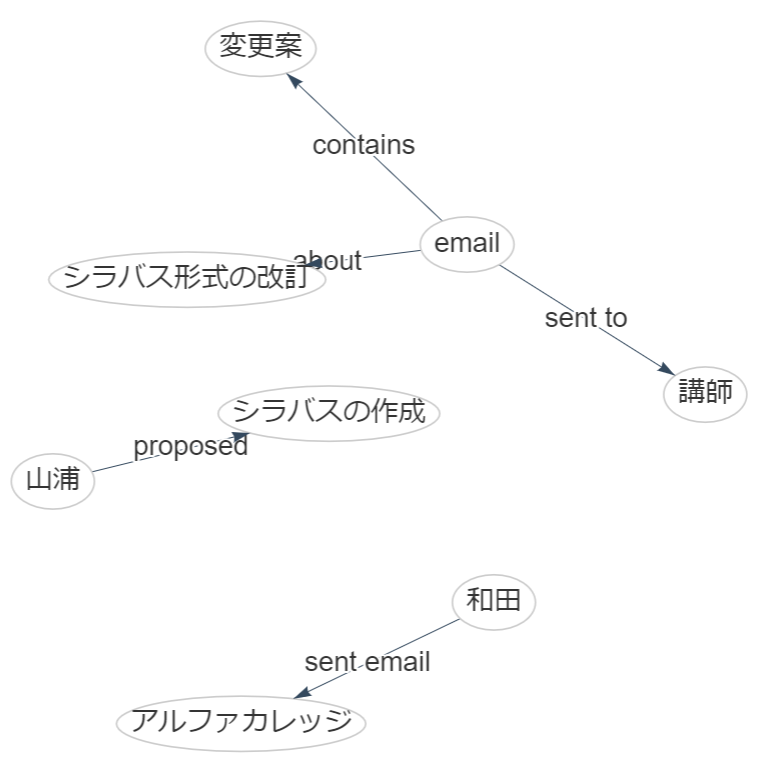

### 4. ビジネスメールの可視化と要約処理(refineにテンプレートを付けて処理させたもの)    
### The refine Chain：翻訳とオリジナルを繰り返す自動要約   

In [8]:
# プロンプトをテンプレートを用いてカスタマイズ(map_reduce)
from langchain import PromptTemplate

template = """
次の文章から、「テーマ」は何か？「テーマ」を質問の形にすると、どうなるか？「期待する反応」は何だとうか？を簡素に記してください。
文章：{text}
"""

PROMPT = PromptTemplate(
    input_variables=["text"],
    template=template,
)

In [9]:
chain = load_summarize_chain(llm, chain_type="map_reduce", map_prompt=PROMPT, combine_prompt=PROMPT, verbose=True)

In [10]:
chain.run(docs)



> Entering new MapReduceDocumentsChain chain...
Prompt after formatting:

次の文章から、「テーマ」は何か？「テーマ」を質問の形にすると、どうなるか？「期待する反応」は何だとうか？を簡素に記してください。
文章：件名：
アルファカレッジのシラバスの件

本文：
山浦マネージャー
お疲れ様です。
さっそくですが、アルファカレッジのシラバス作成時期となりました。
ついてはアルファカレッジの来年度のシラバス書式の案を検討しました。
添付のファイルの案のように改訂したいと考えます。
早々に、講師陣にシラバス作成を依頼したいと考えます。

和田



> Entering new LLMChain chain...
Prompt after formatting:

次の文章から、「テーマ」は何か？「テーマ」を質問の形にすると、どうなるか？「期待する反応」は何だとうか？を簡素に記してください。
文章：テーマ：アルファカレッジの来年度のシラバス作成について
質問の形：アルファカレッジの来年度のシラバス作成について、どのような案が検討されているか？
期待する反応：山浦マネージャーからのシラバス案の検討結果や講師陣への依頼についての返信。


> Finished chain.

> Finished chain.


'テーマ：アルファカレッジの来年度のシラバス作成について\n質問の形：アルファカレッジの来年度のシラバス作成について、どのような案が検討されているか？\n期待する反応：山浦マネージャーからのシラバス案の検討結果や講師陣への依頼についての返信。'

### テーマ：アルファカレッジの来年度のシラバス作成について    

### 質問の形：アルファカレッジの来年度のシラバス作成について、どのような案が検討されているか？    

### 期待する反応：山浦マネージャーからのシラバス案の検討結果や講師陣への依頼についての返信。    

#### 書籍の解答例 『ロジカル・シンキング練習帳』 P48-P51 照屋華子著 2018年7月
#### 問い１　シラバス書式の改訂の提案
#### 問い２　どのようにシラバス書式を改訂するのか？
#### 問い３　山浦マネージャーに改訂案を承認してほしい。

#### これまでのビジネスメールを読み込ませるとさらに有効になるのが「refine」


In [11]:
# 2. The refine Chain：翻訳とオリジナルを繰り返す自動要約
%%time
chain = load_summarize_chain(llm, chain_type="refine", verbose=True)
chain.run(docs)



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"件名：
アルファカレッジのシラバスの件

本文：
山浦マネージャー
お疲れ様です。
さっそくですが、アルファカレッジのシラバス作成時期となりました。
ついてはアルファカレッジの来年度のシラバス書式の案を検討しました。
添付のファイルの案のように改訂したいと考えます。
早々に、講師陣にシラバス作成を依頼したいと考えます。

和田"


CONCISE SUMMARY:

> Finished chain.

> Finished chain.
CPU times: user 46.3 ms, sys: 6.38 ms, total: 52.7 ms
Wall time: 4.89 s


'The email is about the syllabus for Alpha College and the manager, Yamaura, suggests revising the format for the upcoming academic year. The attached file contains the proposed changes and they plan to request the instructors to start creating the syllabus soon. The email is from Wada.'

#### そのメールはアルファカレッジのシラバスに関するもので、管理者の山浦は来年度に向けてフォーマットを改訂することを提案しています。添付ファイルには提案された変更が含まれており、彼らはインストラクターにシラバスの作成をすぐに開始するように要求する予定です。和田からのメールです。    
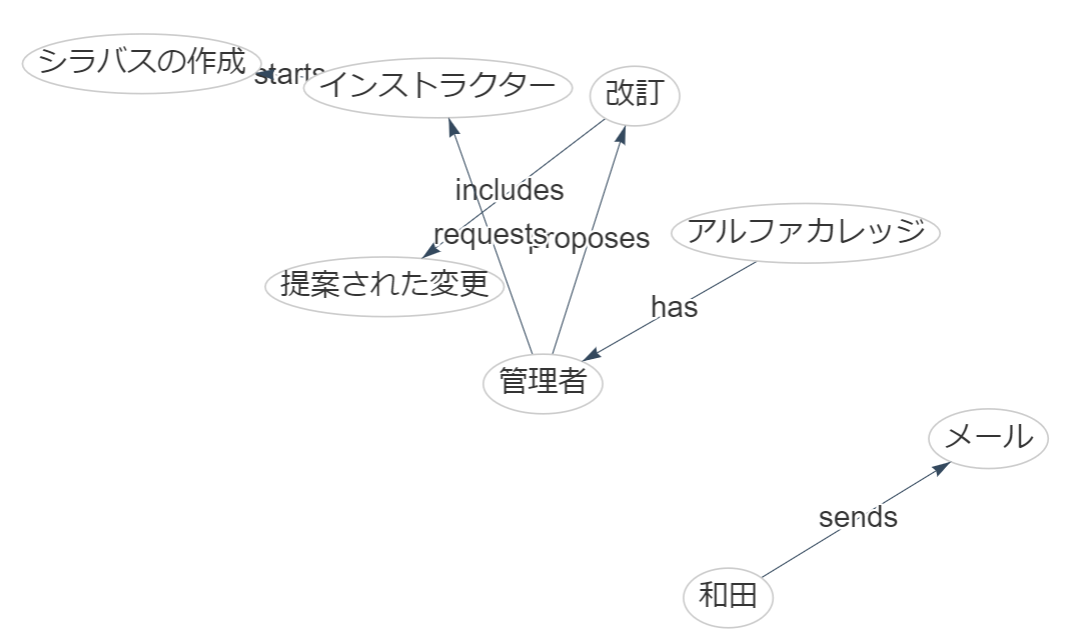


In [12]:
prompt_template = """次の文章からテーマと次にやるべきこと、そして期待されていることを簡素に記してください:

{text}

簡潔な日本語のあらすじ:"""
PROMPT = PromptTemplate(template=prompt_template, input_variables=["text"])


refine_template = (
    
    "「テーマ」は何かを記すことです\n"
    "「テーマ」を質問の形にして記すことです : {existing_answer}\n"
    "「期待する反応」は何かを記すことです\n"
    "------------\n"
    "{text}\n"
    "------------\n"
    "与えられた文章を踏まえて、日本語であらすじを改善してください"
    "与えられた文章が有用でない場合、途中までの文章を返してください"
)
refine_prompt = PromptTemplate(
    input_variables=["existing_answer", "text"],
    template=refine_template,
)

In [13]:
chain = load_summarize_chain(llm, chain_type="refine", question_prompt=PROMPT, refine_prompt=refine_prompt, verbose=True)
chain.run(docs)



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
次の文章からテーマと次にやるべきこと、そして期待されていることを簡素に記してください:

件名：
アルファカレッジのシラバスの件

本文：
山浦マネージャー
お疲れ様です。
さっそくですが、アルファカレッジのシラバス作成時期となりました。
ついてはアルファカレッジの来年度のシラバス書式の案を検討しました。
添付のファイルの案のように改訂したいと考えます。
早々に、講師陣にシラバス作成を依頼したいと考えます。

和田

簡潔な日本語のあらすじ:

> Finished chain.

> Finished chain.


'テーマ：アルファカレッジの来年度のシラバス作成\n次にやるべきこと：講師陣にシラバス作成を依頼する\n期待されていること：改訂したシラバス書式案を添付して、早急に依頼する。'

### テーマ：アルファカレッジの来年度のシラバス作成
### 次にやるべきこと：講師陣にシラバス作成を依頼する
### 期待されていること：改訂したシラバス書式案を添付して、早急に依頼する。

#### 書籍の解答例 『ロジカル・シンキング練習帳』 P48-P51 照屋華子著 2018年7月
#### 問い１　シラバス書式の改訂の提案
#### 問い２　どのようにシラバス書式を改訂するのか？
#### 問い３　山浦マネージャーに改訂案を承認してほしい。

### 5.考察・まとめ
### ・テンプレートで詳細な指示を行うことで、適切な返答が得られた。
### ・refineの方がグラフの可視化でも、ノードろエッジが多く生成されており、構造化されていた。
### ・過去のビジネスメールも読み込むことで、より秀逸になることができそうである。
### ・新卒や第2新卒の方々、またスポットで入られるスタッフの方々に有効な知見が得られると思われる。


##### 6.参考文献・URL一覧
##### 1. 『ロジカル・シンキング練習帳』 照屋華子著 2018年7月 P48-P51
##### 2. [LangChain Summarization 公式ドキュメント](https://python.langchain.com/en/latest/use_cases/summarization.html) 20230414時点
##### 3. [LanguChain Summarization Notebook 公式ドキュメント](https://python.langchain.com/en/latest/modules/chains/index_examples/summarize.html) 20230414時点
##### 4. LexRank [sumy](https://pypi.org/project/sumy/) python library
##### 5. [GraphGPT](https://github.com/varunshenoy/GraphGPT) 20230414時点
##### 6. [GraphGPTのアプリ](https://graphgpt.vercel.app/) 20230414時点
##### 7. github [otanet/LangChain_Summarization_202304](https://github.com/otanet/LangChain_Summarization_202304/blob/main/LangChain_%E3%81%82%E3%82%89%E3%81%99%E3%81%98_20230414.ipynb)
#### 8. [ものは聞き様で ChatGPTのTips](https://speakerdeck.com/otanet/tai-tian-bo-san) -Promptを使いこなそう-